# Project 1

---
## Starting code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the API key
from API_keys import geoapify_key
from API_keys import yelp_key
from API_keys import google_key

## Research Question 1: Los Angeles vs. Houston

In [91]:
location = ['Los Angeles','Houston']
business = 'chick-fil-a'
num_results = 50

name = []
alias = []
ID = []
rating = []
review_count = []
area = []

for city in location:
    url = f"https://api.yelp.com/v3/businesses/search?location={city}&term={business}&offset=0&radius=40000&sort_by=best_match&limit={num_results}"
    headers = {
        'accept': 'application/json',
        'Authorization': f'Bearer {yelp_key}'
    }
    response = requests.get(url, headers=headers).json()
    
    for i in range(len(response['businesses'])):
        name.append(response['businesses'][i]['name'])
        alias.append(response['businesses'][i]['alias'])
        rating.append(response['businesses'][i]['rating'])
        review_count.append(response['businesses'][i]['review_count'])
        ID.append(response['businesses'][i]['id'])
        area.append(city)

# params = {
#     'term': 'Chick-fil-A',
#     'location': 'CA',
#     'sort_by':'best_match',
#     'limit':50,
#     'offset':0
# }
# response = requests.get(url, headers=headers, params=params).json()

#response = requests.get(url, headers=headers).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "businesses": [
        {
            "alias": "chick-fil-a-houston-29",
            "categories": [
                {
                    "alias": "hotdogs",
                    "title": "Fast Food"
                },
                {
                    "alias": "chickenshop",
                    "title": "Chicken Shop"
                },
                {
                    "alias": "salad",
                    "title": "Salad"
                }
            ],
            "coordinates": {
                "latitude": 29.7867913,
                "longitude": -95.4675463
            },
            "display_phone": "(713) 686-8542",
            "distance": 1947.5475996207933,
            "id": "5aBdBzfECMoLw0sm_cstTg",
            "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/beHhHhMFadm5kWMXYFExyQ/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "7660 Katy Fwy",
                "address2": "",
                "address3": "",


In [86]:
df_yelp = pd.DataFrame({"name": name,
                        "Alias": alias,
                        "ID": ID,
                        "Rating": rating,
                        "review_count": review_count,
                       "Area":area})

df_yelp

,name,Alias,ID,Rating,review_count,Area
0,Chick-fil-A,chick-fil-a-los-angeles-28,5JuGBCftbVW8qL6B_nCpLA,3.0,158,Los Angeles
1,Chick-fil-A,chick-fil-a-los-angeles-14,9da1jwrQKNdt3zJGO_7AXw,3.5,923,Los Angeles
2,Chick-fil-A,chick-fil-a-los-angeles-24,O-uYhHRebCCAYLlMKCZU7w,2.5,204,Los Angeles
3,Chick-fil-A,chick-fil-a-los-angeles-23,903X7MzJqEW6vKkEF6IDLw,3.0,285,Los Angeles
4,Chick-fil-A,chick-fil-a-los-angeles,Fs7lKMANuifCyDjF99opRA,3.5,534,Los Angeles
...,...,...,...,...,...,...
95,Chick-fil-A,chick-fil-a-houston-10,zxJhuUzPXcwDlBIuli3mOQ,3.0,98,Houston
96,Chick-fil-A,chick-fil-a-houston-44,hlV-yKQVQDm_WvGKRk6tQQ,3.0,94,Houston
97,Chick-fil-A,chick-fil-a-houston-96,r10ug2qRorxlu39m9jfbsg,3.0,107,Houston
98,Chick-fil-A,chick-fil-a-houston-77,_28qUFlhLyZmu-HSyxWWwQ,3.5,51,Houston


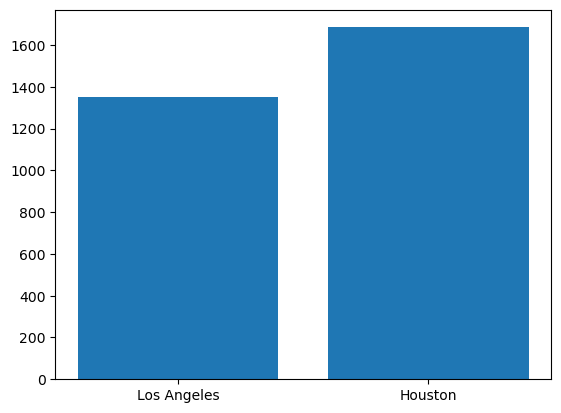

In [88]:
Total1 = df_yelp.loc[df_yelp['Area']==location[0]]['review_count'].sum()/10.01
Total2 = df_yelp.loc[df_yelp['Area']==location[1]]['review_count'].sum()/2.3
#count = df_yelp['Area']
count = [Total1, Total2]
plt.bar(location,count)
plt.show()

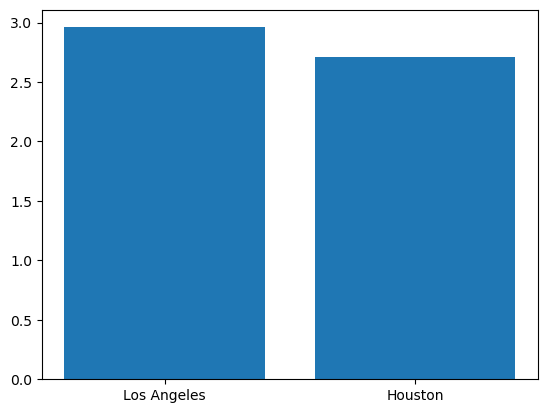

In [90]:
Avg1 =df_yelp.loc[df_yelp['Area']==location[0]]['Rating'].mean()
Avg2 =df_yelp.loc[df_yelp['Area']==location[1]]['Rating'].mean()
avg = [Avg1, Avg2]
plt.bar(location,avg)
plt.show()

In [73]:
# output the file as picture
plt.savefig("Output/Geographical_Analysis.png")

<Figure size 640x480 with 0 Axes>

## Research Question 2: Key Word Analysis

In [4]:
# Generate dataframe with API


In [5]:
# output the file as picture
plt.savefig("Output/KeyWord.png")

<Figure size 640x480 with 0 Axes>

## Research Question 3: Competition Analysis

In [6]:
# Generate dataframe with API


In [7]:
# output the file as picture
plt.savefig("Output/Competition.png")

<Figure size 640x480 with 0 Axes>